# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_complete = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
# Display the data table for preview
results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
results_complete.nunique()["Mouse ID"]

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


results_complete_duplicates = results_complete[results_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
results_complete_duplicates["Mouse ID"]

#This is for the code cell below, but I stumbled upon it here
#results_complete.loc[results_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False),:]
    #Taken from https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#I worked on this with the help of a tutor. It's probably a little redudant since
    #results_complete_duplicates_full = results_complete.loc[results_complete["Mouse ID"] == "g989",:]
#would have worked but I wanted to write a code that could be used again hypothetically

#This code creates an empty data frame with the same column headers, and then runs through every unique
#item in results_complete_duplicates and then creates a dataframe of just those rows (called "results_complete_duplicates_full)
#and then that concats each time the loop is run into "results_complete_duplicates_full_df"
#(I know my dataframe naming got out of hand here, but I'll leave it since I don't think I'll use these data frames elsewhere)
results_complete_duplicates["Mouse ID"].unique()

results_complete_duplicates_full_df = pd.DataFrame({
    "Mouse ID":[],
    "Timepoint":[],
    "Tumor Volume (mm3)":[],
    "Metastatic Sites":[],
    "Drug Regimen":[],
    "Sex":[],
    "Age_months":[],
    "Weight (g)":[]
})

for i in results_complete_duplicates["Mouse ID"].unique():
    results_complete_duplicates_full = results_complete.loc[results_complete["Mouse ID"] == i,:]
    results_complete_duplicates_full_df = pd.concat([results_complete_duplicates_full_df, results_complete_duplicates_full], ignore_index = True)


#This is one way of doing this, but doesn't seem to be 'right' since it doesn't include the Timepoint = 20, 25, and 30 rows:
#results_complete.loc[results_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False),:]
    #Taken from https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

results_complete_duplicates_full_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
1,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
2,g989,5.0,48.786801,0.0,Propriva,Female,21.0,26.0
3,g989,5.0,47.570392,0.0,Propriva,Female,21.0,26.0
4,g989,10.0,51.745156,0.0,Propriva,Female,21.0,26.0
5,g989,10.0,49.880528,0.0,Propriva,Female,21.0,26.0
6,g989,15.0,51.325852,1.0,Propriva,Female,21.0,26.0
7,g989,15.0,53.442020,0.0,Propriva,Female,21.0,26.0
8,g989,20.0,55.326122,1.0,Propriva,Female,21.0,26.0
9,g989,20.0,54.657650,1.0,Propriva,Female,21.0,26.0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results_complete = results_complete.drop(results_complete[results_complete["Mouse ID"]=="g989"].index).reset_index(drop=True)

clean_results_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_results_complete.nunique()["Mouse ID"]

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_results = clean_results_complete.groupby(["Drug Regimen"])
mean_tumor_volume = grouped_results.mean()["Tumor Volume (mm3)"]
median_tumor_volume = grouped_results.median()["Tumor Volume (mm3)"]
variance_tumor_volume = grouped_results.var()["Tumor Volume (mm3)"]
standard_deviation_tumor_volume = grouped_results.std()["Tumor Volume (mm3)"]
standard_error_tumor_volume = grouped_results.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

summary_results = pd.DataFrame({
    "Mean Tumor Volume (mm3)" : mean_tumor_volume,
    "Median Tumor Volume (mm3)" : median_tumor_volume,
    "Tumor Volume Variance" : variance_tumor_volume,
    "Tumor Volume Std. Dev." : standard_deviation_tumor_volume,
   "Tumor Volume Std. Err." : standard_error_tumor_volume  
})

summary_results


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

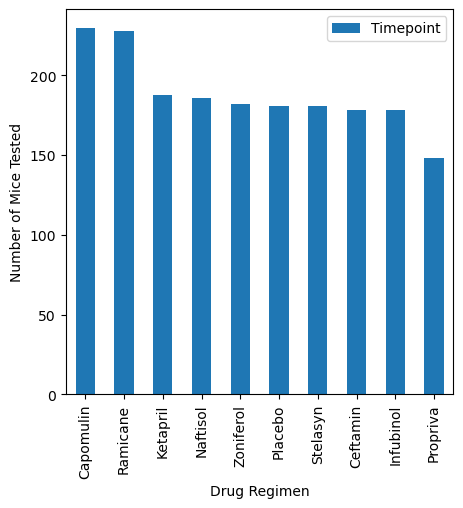

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_and_timepoints = grouped_results[["Timepoint"]].count()
drug_and_timepoints = drug_and_timepoints.sort_values(by = "Timepoint", ascending = False)
drug_and_timepoints.plot(kind="bar", figsize=(5,5), ylabel = "Number of Mice Tested")
plt.show()
plt.tight_layout()

drug_and_timepoints.head()

<PandasArray>
[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
Length: 10, dtype: int64

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

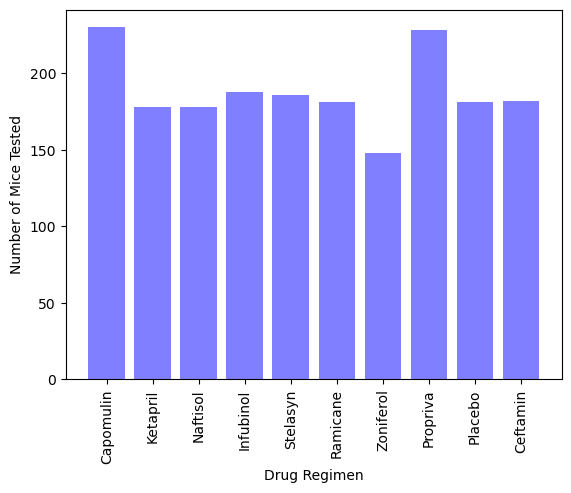

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

###### Can't quite figure out this bit - my graph is out of order! #####

#Get the timepoints (but this returns a series)
timepoints = grouped_results["Timepoint"].count()
#Convert it to an array for plotting
timepoints_array = timepoints.array

#Return each drug regiment in an array
drug_regimen = clean_results_complete["Drug Regimen"].unique()

#Define the x-axis points
x_axis = np.arange(len(drug_regimen))

#Plot the bar chart
plt.bar(x_axis, timepoints, color='blue', alpha=0.5, align="center")

#input the tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen)
plt.xticks(rotation=90)

#Change axes and chart titles

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show

display(timepoints_array)
display(drug_regimen)

<AxesSubplot:ylabel='Mouse ID'>

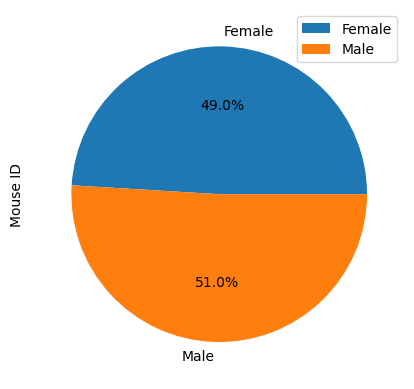

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_counts = clean_results_complete.groupby(["Sex"]).count()
labels = ["Female", "Male"]
mouse_sex_counts.plot(kind = "pie", y = "Mouse ID", labels=labels, autopct="%1.1f%%")

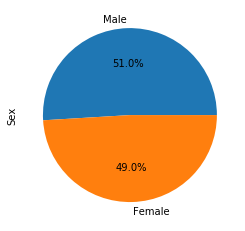

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


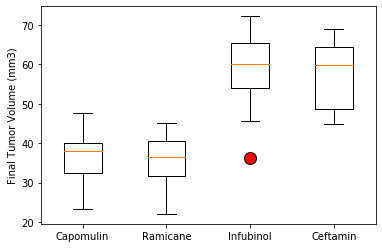

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

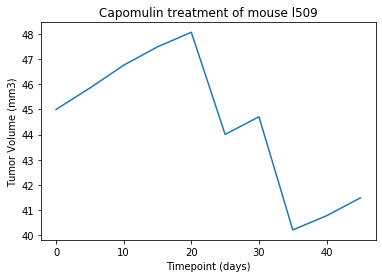

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



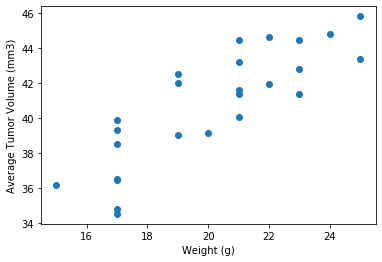

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


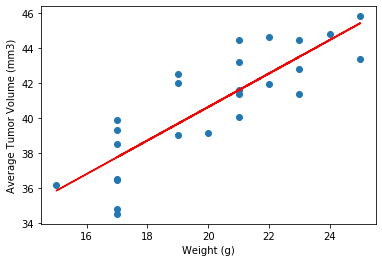

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

